In [ ]:
!pip3 install numpy opencv-python==3.4.2.16 opencv-contrib-python==3.4.2.16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.2.16 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==3.4.2.16


In [6]:
import cv2
from google.colab.patches import cv2_imshow

# reading the image
img = cv2.imread('r.ppm')

In [7]:
# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
# detect features from the image
keypoints, descriptors = sift.detectAndCompute(img, None)

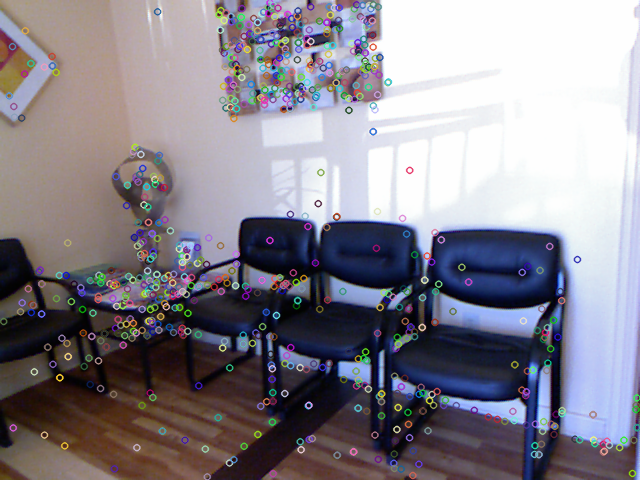

4.7.0


In [10]:
# draw the detected key points
sift_image = cv2.drawKeypoints(img, keypoints, outImage=None)
# show the image
cv2_imshow(sift_image)
print(cv2.__version__)

In [ ]:
# Convert SIFT keypoints to ORB format
orb_keypoints = []
octave_values = []

for sift_kp in keypoints:
    x, y = round(sift_kp.pt[0]), round(sift_kp.pt[1])  # Round x and y to integers
    size = sift_kp.size  # Adjust the scale of size in SIFT
    angle = sift_kp.angle
    octave = sift_kp.octave
    response = sift_kp.response

    # Add value to octave set
    octave_values.append(octave)

    orb_kp = cv2.KeyPoint(x, y, size, angle, response, octave)
    orb_keypoints.append(orb_kp)


if octave_values:
    min_octave = min(octave_values)
    max_octave = max(octave_values)
    print("Initial Octave Range:", min_octave, "-", max_octave)
else:
    print("No octave values found in SIFT keypoints.")


Initial Octave Range: 511 - 16712447
